### Iimporting the libraries

In [1]:
!pip install wordcloud
!pip install nltk

In [2]:
# Importing the libraries for visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Importing the libraries for text processing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a1kin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Read Dataset

In [3]:
#reading the dataset

df = pd.read_csv('Stack_Overflow_Old.csv')

In [4]:
df.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,4,07/31/2008 21:42:52,8,07/31/2008 21:33:24,1,0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,9,07/31/2008 21:35:26,1,0,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,9,07/31/2008 21:35:26,16,1,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,1,07/31/2008 14:22:31,1,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,1021610,10/31/2011 08:26:49,29,0,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,NaN,open


In [5]:
df.shape

(3370528, 15)

In [6]:
df.columns

Index(['PostId', 'PostCreationDate', 'OwnerUserId', 'OwnerCreationDate',
       'ReputationAtPostCreation', 'OwnerUndeletedAnswerCountAtPostTime',
       'Title', 'BodyMarkdown', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5',
       'PostClosedDate', 'OpenStatus'],
      dtype='object')

#### Dropping the columns/features which are not gonna contribute to the results

In [7]:

df.drop(['OwnerUserId'],axis=1,inplace=True)
df.drop(['OwnerUndeletedAnswerCountAtPostTime'],axis=1,inplace=True)
df.drop(['PostClosedDate'],axis=1,inplace=True)

In [8]:
df.shape

(3370528, 12)

In [9]:
df.columns

Index(['PostId', 'PostCreationDate', 'OwnerCreationDate',
       'ReputationAtPostCreation', 'Title', 'BodyMarkdown', 'Tag1', 'Tag2',
       'Tag3', 'Tag4', 'Tag5', 'OpenStatus'],
      dtype='object')

In [10]:
df.head()

,PostId,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,OpenStatus
0,4,07/31/2008 21:42:52,07/31/2008 21:33:24,1,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,NaN,NaN,NaN,NaN,open
1,6,07/31/2008 22:08:08,07/31/2008 21:35:26,1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,NaN,NaN,NaN,open
2,8,07/31/2008 23:33:19,07/31/2008 21:35:26,16,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,NaN,NaN,NaN,NaN,open
3,9,07/31/2008 23:40:59,07/31/2008 14:22:31,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,NaN,NaN,NaN,NaN,open
4,9610539,03/07/2012 23:07:09,10/31/2011 08:26:49,29,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,NaN,NaN,open


#### Checking null values in the tag columns

In [11]:
#checking null values in the tag columns
df['Tag1'].isnull().sum()
# df['Tag2'].isnull().sum()
# df['Tag3'].isnull().sum()
# df['Tag4'].isnull().sum()
# df['Tag5'].isnull().sum()

160

#### Elminate Null Values

In [12]:
#there are many nulll values in the tag columns, we need to elminate the null values
df['Tag1']=df['Tag1'].replace(np.nan,' ')
df['Tag2']=df['Tag2'].replace(np.nan,' ')
df['Tag3']=df['Tag3'].replace(np.nan,' ')
df['Tag4']=df['Tag4'].replace(np.nan,' ')
df['Tag5']=df['Tag5'].replace(np.nan,' ')


#### Tags are just the tags related to the question, we can combine them all into one column

In [13]:

df['Tags']=df['Tag1']+' '+df['Tag2']+' '+df['Tag3']+' '+df['Tag4']+' '+df['Tag5']

#### Changing into lower case and removing the whitespaces

In [14]:
df['Tags']=df['Tags'].str.lower()
df['Tags']=df['Tags'].apply(lambda x:x.lstrip())
df['Tags']=df['Tags'].apply(lambda x:x.rstrip())

In [15]:
df.head()

,PostId,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,OpenStatus,Tags
0,4,07/31/2008 21:42:52,07/31/2008 21:33:24,1,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,,,,,open,c#
1,6,07/31/2008 22:08:08,07/31/2008 21:35:26,1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,,,,open,html css
2,8,07/31/2008 23:33:19,07/31/2008 21:35:26,16,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,,,,,open,j#
3,9,07/31/2008 23:40:59,07/31/2008 14:22:31,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,,,,,open,c#
4,9610539,03/07/2012 23:07:09,10/31/2011 08:26:49,29,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,,,open,iphone objective-c ios5


In [17]:
df.head()

,PostId,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,OpenStatus,Tags
0,4,07/31/2008 21:42:52,07/31/2008 21:33:24,1,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,,,,,open,c#
1,6,07/31/2008 22:08:08,07/31/2008 21:35:26,1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,,,,open,html css
2,8,07/31/2008 23:33:19,07/31/2008 21:35:26,16,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,,,,,open,j#
3,9,07/31/2008 23:40:59,07/31/2008 14:22:31,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,,,,,open,c#
4,9610539,03/07/2012 23:07:09,10/31/2011 08:26:49,29,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,,,open,iphone objective-c ios5


In [18]:
# df['markdown'] = df['markdown'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s.]', '', x))
# df['markdown'] = df['markdown'].apply(lambda x: re.sub(r'[<>!/-]', '', x))


In [19]:
df.head()

,PostId,PostCreationDate,OwnerCreationDate,ReputationAtPostCreation,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,OpenStatus,Tags
0,4,07/31/2008 21:42:52,07/31/2008 21:33:24,1,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",c#,,,,,open,c#
1,6,07/31/2008 22:08:08,07/31/2008 21:35:26,1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,html,css,,,,open,html css
2,8,07/31/2008 23:33:19,07/31/2008 21:35:26,16,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,j#,,,,,open,j#
3,9,07/31/2008 23:40:59,07/31/2008 14:22:31,1,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",c#,,,,,open,c#
4,9610539,03/07/2012 23:07:09,10/31/2011 08:26:49,29,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,iphone,objective-c,ios5,,,open,iphone objective-c ios5


## Visulization

#### Question Counts by Closing Reasons

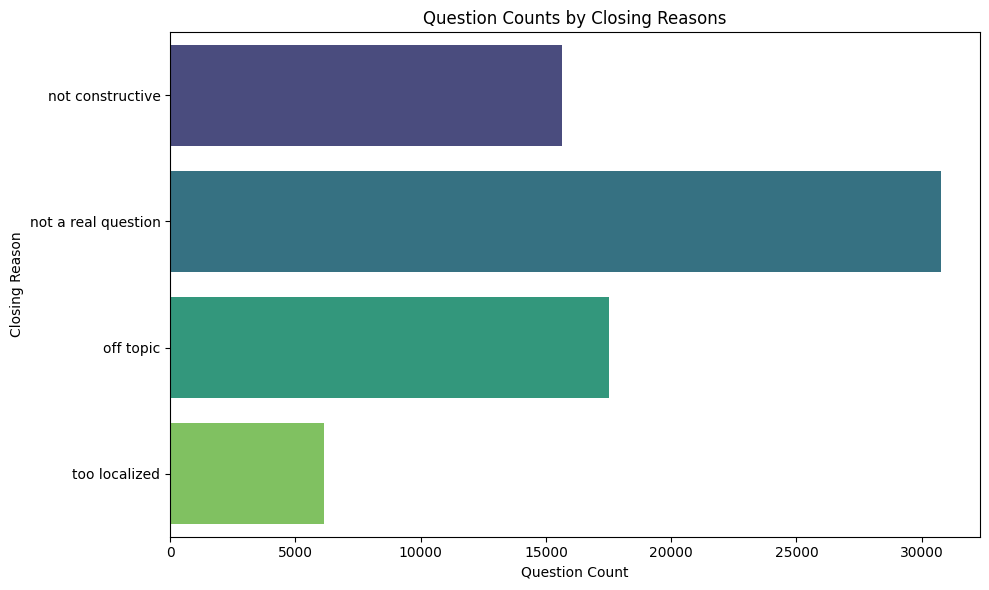

In [20]:


# Sample data
closing_reasons = ['not constructive', 'not a real question', 'off topic', 'too localized']
#count for each closing reasons in dataset
question_counts = [df[df['OpenStatus'] == 'not constructive'].shape[0], df[df['OpenStatus'] == 'not a real question'].shape[0], df[df['OpenStatus'] == 'off topic'].shape[0], df[df['OpenStatus'] == 'too localized'].shape[0]]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=closing_reasons, x=question_counts,  palette='viridis', orient='h',hue=closing_reasons)
plt.xlabel('Question Count')

plt.ylabel('Closing Reason')
plt.title('Question Counts by Closing Reasons')
plt.tight_layout()
plt.show()




#### Top 20 Tags

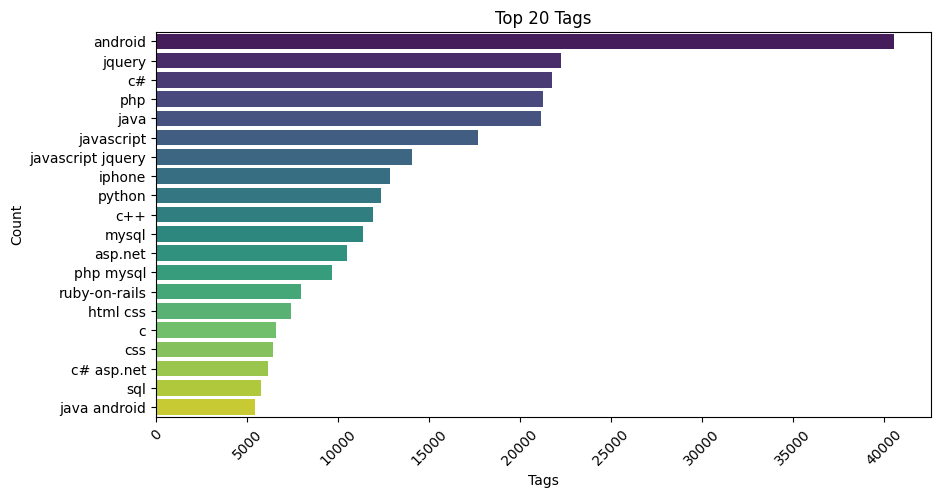

In [21]:

# Assuming 'df' is your original DataFrame
top_tags = df['Tags'].value_counts().head(20)

# Plotting the top 20 tags
plt.figure(figsize=(10, 5))
sns.barplot(y=top_tags.index,x= top_tags.values, palette='viridis',hue=top_tags.index)
plt.title('Top 20 Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Top Tags for Closed Questions & Open Questions

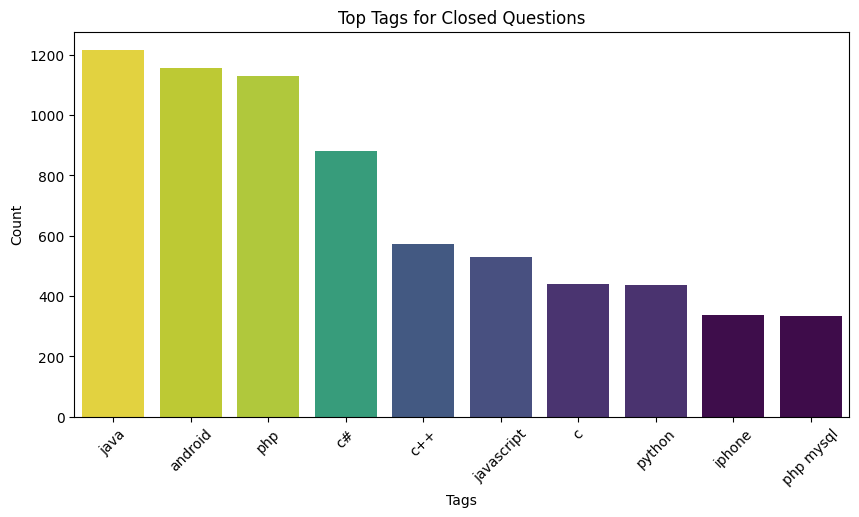

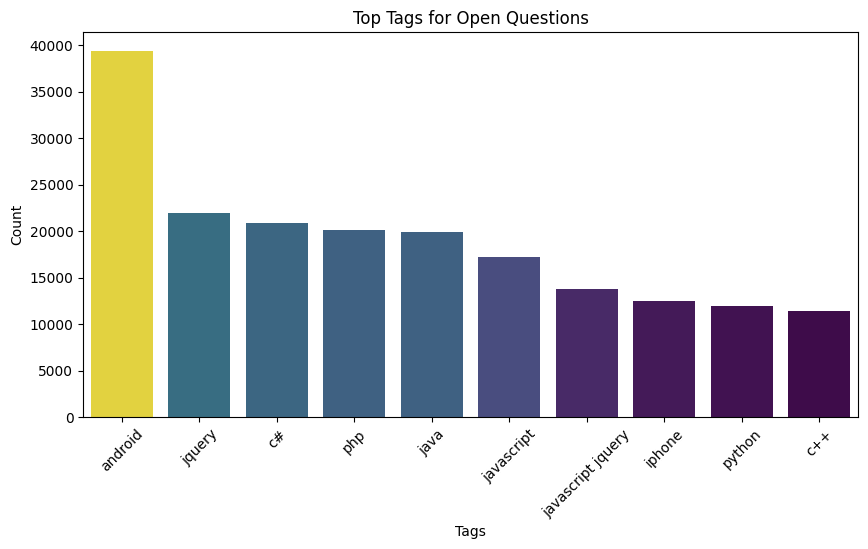

In [22]:

#as there are 5 classes out of wich 4 are subclasses for the class 'closed', we'll be merging those 4 classes
closed_classes = ['not constructive', 'not a real question', 'off topic', 'too localized']
df['OpenStatus'] = df['OpenStatus'].replace(closed_classes, 'closed')

# Splitting the dataset into closed and open questions
df_closed = df[df['OpenStatus'] == 'closed']
df_open = df[df['OpenStatus'] == 'open']

# Top tags for closed questions
top_closed_tags = df_closed['Tags'].value_counts().head(10)

# Top tags for open questions
top_open_tags = df_open['Tags'].value_counts().head(10)

# Plotting the top tags for closed questions
plt.figure(figsize=(10, 5))
sns.barplot(x=top_closed_tags.index, y=top_closed_tags.values, palette='viridis',hue=top_closed_tags.values,legend=False)
plt.title('Top Tags for Closed Questions')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the top tags for open questions
plt.figure(figsize=(10, 5))
sns.barplot(x=top_open_tags.index, y=top_open_tags.values, palette='viridis',hue=top_open_tags.values,legend=False )
plt.title('Top Tags for Open Questions')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Word Cloud of Question Titles 

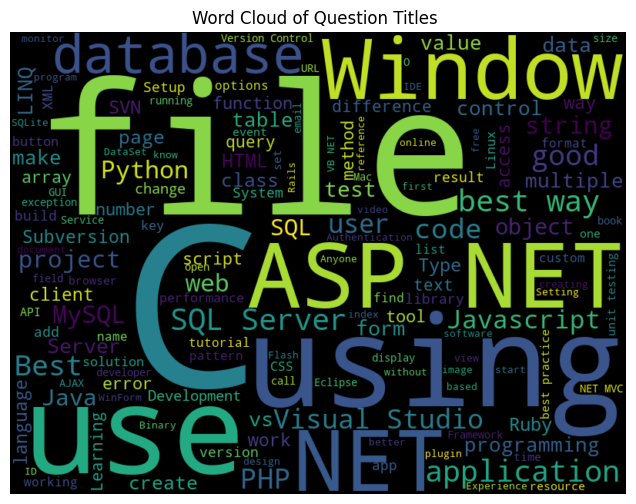

In [23]:

text = " ".join(title for title in df['Title'][:1000])

wordcloud = WordCloud(width=800, height=600, max_words=150).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Titles ")
plt.show()

## Preprocessing

In [24]:
df.drop(['PostId','OwnerCreationDate','Tag1','Tag2','Tag3','Tag4','Tag5'],axis=1,inplace=True)
df.drop(['ReputationAtPostCreation'],axis=1,inplace=True)
df.drop(['PostCreationDate'],axis=1,inplace=True)

In [25]:
df.head()

,Title,BodyMarkdown,OpenStatus,Tags
0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",open,c#
1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,open,html css
2,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,open,j#
3,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",open,c#
4,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,open,iphone objective-c ios5


In [26]:
df.OpenStatus.unique()

array(['open', 'closed'], dtype=object)

In [27]:
df.head()

,Title,BodyMarkdown,OpenStatus,Tags
0,Decimal vs Double?,"I'm new to C#, and I want to use a trackbar fo...",open,c#
1,Percentage width child in absolutely positione...,I've got an absolutely positioned div containi...,open,html css
2,Tools for porting J# code to C#,Are there any conversion tools for porting Vis...,open,j#
3,How do I calculate someone's age in c#?,"Given a DateTime representing their birthday, ...",open,c#
4,retrieve data from NSUserDefaults to TableView,I save values of two labels through NSUserDefa...,open,iphone objective-c ios5


In [28]:
#making a smaller dataset out of the big one
sample_size = 50000  # Specify the size of the sample
sample_df = df.sample(n=sample_size, random_state=42) 

In [29]:
#text preprocessing
def preprocess_text(text):
    #convert to lowercase
    text = text.lower()
    
    #remove HTML tags
    text = remove_html_tags(text)
    
    #remove URL tags
    text = remove_urls(text)
    
    #remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    #tokenize the text into individual words
    tokens = word_tokenize(text)
    
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    #join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

#function to remove HTML tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

#function to remove URL links
def remove_urls(text):
    pattern = re.compile(r'http\S+|www\S+')
    return pattern.sub(r'', text)

#apply preprocessing to the 'Title' and 'BodyMarkdown' columns
sample_df['Title'] = sample_df['Title'].apply(preprocess_text)
sample_df['BodyMarkdown'] = sample_df['BodyMarkdown'].apply(preprocess_text)
sample_df['Tags'] = sample_df['Tags'].apply(preprocess_text)

#display the preprocessed dataset
sample_df.head()

,Title,BodyMarkdown,OpenStatus,Tags
1685842,get value attribute checkbox javascript function,function getvalue document getelementbyid requ...,open,php mysql html checkbox value
2735337,search string multiple field table,table user field id first name middle name las...,open,php mysql sql query
2889559,create static subview navigation controller,created navigation controller stack view contr...,open,io xcode uiview uinavigationcontroller three
2117858,use default password lock screen android appli...,new android want use default password lock scr...,open,android lockscreen
361717,grail gorm enums,problem using enumeration grail try use enumer...,open,grail groovy enums


In [30]:
sample_df.OpenStatus.unique()

array(['open', 'closed'], dtype=object)

In [31]:
#encoding the OpenStatus so that categorical classes will be transformed into numeric

encoder = LabelEncoder()
encoder.fit(sample_df['OpenStatus'])
sample_df['OpenStatus'] = encoder.transform(sample_df['OpenStatus'])

In [32]:
sample_df.head()


,Title,BodyMarkdown,OpenStatus,Tags
1685842,get value attribute checkbox javascript function,function getvalue document getelementbyid requ...,1,php mysql html checkbox value
2735337,search string multiple field table,table user field id first name middle name las...,1,php mysql sql query
2889559,create static subview navigation controller,created navigation controller stack view contr...,1,io xcode uiview uinavigationcontroller three
2117858,use default password lock screen android appli...,new android want use default password lock scr...,1,android lockscreen
361717,grail gorm enums,problem using enumeration grail try use enumer...,1,grail groovy enums


In [33]:
sample_df.OpenStatus.unique()

array([1, 0])

In [34]:
#splitting the dataset into train and test set
x = sample_df['Title'] + ' '+ sample_df['BodyMarkdown']+' '+sample_df['Tags']
y = sample_df['OpenStatus']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 203)

In [35]:
xtrain.head()

2606099    passing wordpress post id jquery selector im t...
3118748    left ward greedyness group regex next regex sa...
2478403    using local resource silver light need know op...
2330292    calling protocol framework currently using nin...
2448436    dashed unordered list ckeditor trying find way...
dtype: object

In [36]:
xtest.head()

3137521    extract class name method name sample project ...
1422241    key attribute keyword rail diaspora class incl...
962666     java check object fetched garbage collector wa...
1641918    complete n b web development need suggestion c...
1470065    achieve using atomicboolean make sure initiali...
dtype: object

In [37]:
#converting words to numbers using TF-IDF ie performing vectorization

vectorizer = TfidfVectorizer(max_features = 10000)
xtrain_tfidf = vectorizer.fit_transform(xtrain).toarray()  # converting words to numbers for train data 
xtest_tfidf = vectorizer.transform(xtest).toarray()        # converting words to numbers for test data 

In [38]:
xtrain_tfidf.shape

(35000, 10000)

In [39]:
sample_df.shape

(50000, 4)

#### Modeling

In [40]:

model = Sequential()
model.add(Dense(16, input_dim=xtrain_tfidf.shape[1], activation='relu'))  
model.add(Dense(4, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(xtrain_tfidf, ytrain, epochs=10, batch_size=32, validation_data=(xtest_tfidf,ytest))
loss, accuracy = model.evaluate(xtest_tfidf, ytest)
print('Test Accuracy:', accuracy)






Epoch 1/10


1094/1094 [==============================] - 9s 7ms/step - loss: 0.1612 - accuracy: 0.9780 - val_loss: 0.0962 - val_accuracy: 0.9788
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0852 - accuracy: 0.9800 - val_loss: 0.0921 - val_accuracy: 0.9788
Epoch 3/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0734 - accuracy: 0.9800 - val_loss: 0.0916 - val_accuracy: 0.9788
Epoch 4/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0612 - accuracy: 0.9803 - val_loss: 0.0970 - val_accuracy: 0.9785
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0501 - accuracy: 0.9830 - val_loss: 0.1082 - val_accuracy: 0.9773
Epoch 6/10
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0407 - accuracy: 0.9861 - val_loss: 0.1224 - val_accuracy: 0.9749
Epoch 7/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.1385 - val_accur

In [41]:
y_pred = model.predict(xtest_tfidf)
y_pred

469/469 [==============================] - 2s 4ms/step


array([[0.9999998],
       [1.       ],
       [1.       ],
       ...,
       [0.999999 ],
       [0.9999995],
       [0.999739 ]], dtype=float32)

In [42]:


# Convert continuous predictions to binary values using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(ytest, y_pred_binary))



              precision    recall  f1-score   support

           0       0.15      0.12      0.13       318
           1       0.98      0.98      0.98     14682

    accuracy                           0.97     15000
   macro avg       0.56      0.55      0.56     15000
weighted avg       0.96      0.97      0.96     15000



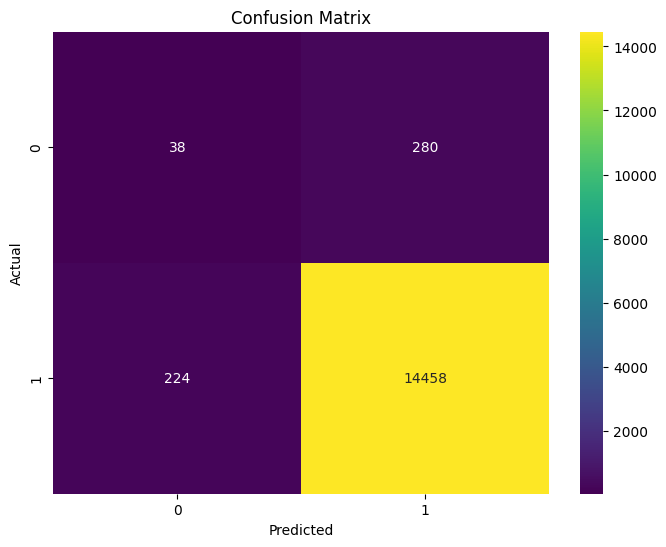

In [43]:

conf_matrix = confusion_matrix(ytest, y_pred_binary)
conf_matrix


# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
